In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('death_character.csv')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
 data.drop(['alive','plod','Name','age','book1','book2','book3','book4','book5'],1,inplace=True)

In [10]:
data['culture'] = data['culture'].fillna('NotKnown')
data['house'] = data['house'].fillna('Unknown')


In [11]:
data.Allegiances = pd.factorize(data.Allegiances)[0]
data.culture = pd.factorize(data.culture)[0]
data.house = pd.factorize(data.house)[0]


In [12]:
data = data[['actual','popularity','house','Allegiances','culture']]


In [27]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

/Users/omkar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.46748356 0.24549777 0.15373277 0.13328589]


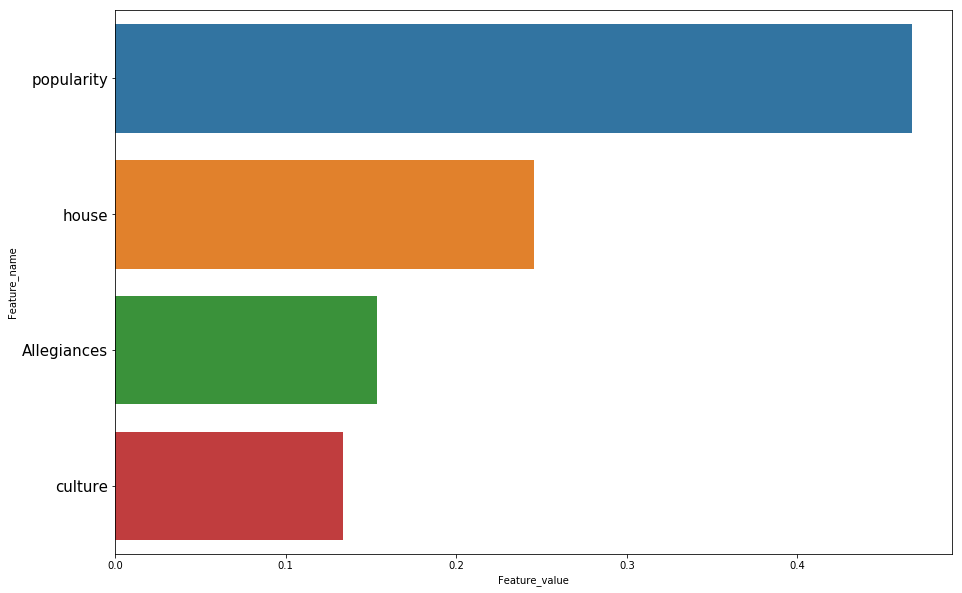

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns).rename_axis('Feature_name').reset_index(name='Feature_value')
plt.figure(figsize=(15,10))
plt.yticks(fontsize=15)
sns.barplot(x='Feature_value',y='Feature_name',data=feat_importances)
plt.show()

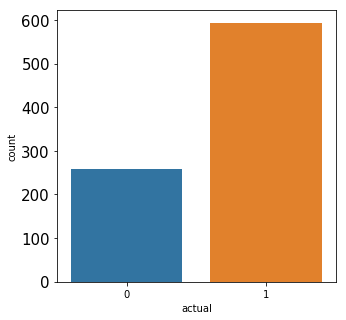

In [29]:
plt.figure(figsize=(5,5))
plt.yticks(fontsize=15)
sns.countplot(x='actual',data=data)
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 5 columns):
actual         852 non-null int64
popularity     852 non-null float64
house          852 non-null int64
Allegiances    852 non-null int64
culture        852 non-null int64
dtypes: float64(1), int64(4)
memory usage: 33.4 KB


In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics as metrics


In [32]:
smt = SMOTE()


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
enc = OneHotEncoder()
X = enc.fit_transform(X)


/Users/omkar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<852x310 sparse matrix of type '<class 'numpy.float64'>'
	with 3408 stored elements in Compressed Sparse Row format>

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [38]:
X_sm , y_sm = smt.fit_sample(X_train, y_train)

In [39]:
np.bincount(y_sm)

array([469, 469])

In [48]:
# Lets train an algorithm obn this 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, confusion_matrix, precision_score, recall_score,classification_report, accuracy_score


In [49]:
clf1 = RandomForestClassifier(n_estimators=30, max_depth=10,random_state=12)
r_clf_wo_smote = clf1.fit(X_train,y_train)

y_pred1 = r_clf_wo_smote.predict(X_test)


print("Accuracy : %.4f" % accuracy_score(y_test, y_pred1))

print(classification_report(y_test, y_pred1, target_names=target_names))

Accuracy : 0.7310
Accuracy : 0.7193
              precision    recall  f1-score   support

      Living       0.60      0.06      0.12        47
        Dead       0.73      0.98      0.84       124

    accuracy                           0.73       171
   macro avg       0.67      0.52      0.48       171
weighted avg       0.70      0.73      0.64       171



In [66]:
clf = RandomForestClassifier(n_estimators=30, max_depth=10,random_state=12)

r_clf = clf.fit(X_sm,y_sm)

y_pred = r_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)*100

print("Accuracy : %.4f" % acc)



Accuracy : 71.9298


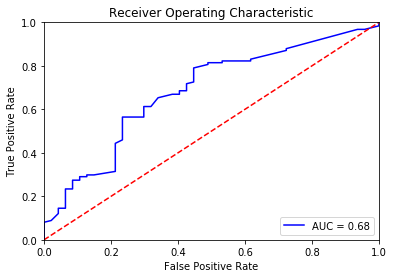

In [64]:
probs = r_clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()